In [1]:
import numpy as np
from collections import Counter

In [2]:

class KNN:
    def __init__(self,k=5):
        self.k=k
    def fit(self,X_train,y_train):
        self.X_train=X_train
        self.y_train=y_train
    def predict(self,X_test):
        predication=[]
        
        if X_test.ndim==2:
            for i in range(len(X_test)):
                #print(i)
                predication.append(self.find_distance(X_test[i,:]))
            return np.asarray(predication)
        else:
            print('Expected 2D array,got insted 1D array')
    def find_distance(self,test):
        distance=[]
        target=[]
        for i in range(len(self.X_train)):
            d=np.sqrt(np.sum(np.square(test-self.X_train[i,:])))
            distance.append([d,i])
        distance =sorted(distance,key=lambda x:x[0])
        
        for i in range(self.k):
            index=distance[i][1]
            target.append(self.y_train[index])
        vote=Counter(target).most_common(1)[0][0]
        #print(Counter(target).most_common(1))
            
        return vote

In [3]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
#from sklearn.model_selection import train_test_split

In [4]:
d=load_iris()

In [5]:
d.data.shape

(150, 4)

In [6]:
d.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
d.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
d.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
X=d.data

In [10]:
y=d.target

In [11]:
X.ndim

2

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=10)

In [14]:
X_train.shape

(120, 4)

In [15]:
X_test.shape

(30, 4)

In [16]:
#y_train.shape

In [17]:
#y_test.shape

# Train model with training data

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn=KNeighborsClassifier()

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

# 3.Make predication on testing data

In [21]:
pre=knn.predict(X_test)

In [22]:
pre

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2])

# 4.Evaluation

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test,pre)

0.9666666666666667

In [25]:
np.where(y_test!=pre)

(array([6], dtype=int64),)

In [26]:
pre[24]

1

In [27]:
y_test[2]

0

In [28]:
k1=KNN()

In [29]:
k1.fit(X_train,y_train)

In [30]:
t=X_test[0].reshape(1,-1)

In [31]:
#print(t)

In [32]:
k1.predict(t)

array([1])

In [33]:
y_test[0]

1

In [34]:
p=k1.predict(X_test)

In [35]:
p

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2])

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,p)

0.9666666666666667

In [38]:
np.where(y_test!=p)

(array([6], dtype=int64),)

In [39]:
p[24]

1

In [40]:
y_test[2]

0

In [41]:
distance,k=knn.kneighbors(X_test[24].reshape(1,-1),n_neighbors=5,return_distance=True)

In [42]:
distance

array([[0.3       , 0.33166248, 0.36055513, 0.37416574, 0.38729833]])

In [43]:
k

array([[ 53,  23,  49, 104,   1]], dtype=int64)

In [44]:
for i in k:
    print(y_train[i])

[1 1 1 1 1]


In [45]:
# gridesearchCV

In [46]:
for i in [2,2,1,2,1]:
    kn=KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,y_train)
    print(kn.score(X_test,y_test))

0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667


In [47]:
import matplotlib.pyplot as plt

In [48]:
X=d.data[:,2:]
y=d.target

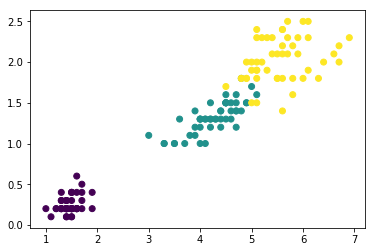

In [49]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()
